In [2]:
import nltk
import pandas as pd

In [23]:
nltk.download('gutenberg')

[nltk_data] Downloading package gutenberg to
[nltk_data]     /Users/myhome/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


True

In [24]:
from nltk.corpus import gutenberg
sentences = [list(s) for s in gutenberg.sents()]
sentences

[['[', 'Emma', 'by', 'Jane', 'Austen', '1816', ']'],
 ['VOLUME', 'I'],
 ['CHAPTER', 'I'],
 ['Emma',
  'Woodhouse',
  ',',
  'handsome',
  ',',
  'clever',
  ',',
  'and',
  'rich',
  ',',
  'with',
  'a',
  'comfortable',
  'home',
  'and',
  'happy',
  'disposition',
  ',',
  'seemed',
  'to',
  'unite',
  'some',
  'of',
  'the',
  'best',
  'blessings',
  'of',
  'existence',
  ';',
  'and',
  'had',
  'lived',
  'nearly',
  'twenty',
  '-',
  'one',
  'years',
  'in',
  'the',
  'world',
  'with',
  'very',
  'little',
  'to',
  'distress',
  'or',
  'vex',
  'her',
  '.'],
 ['She',
  'was',
  'the',
  'youngest',
  'of',
  'the',
  'two',
  'daughters',
  'of',
  'a',
  'most',
  'affectionate',
  ',',
  'indulgent',
  'father',
  ';',
  'and',
  'had',
  ',',
  'in',
  'consequence',
  'of',
  'her',
  'sister',
  "'",
  's',
  'marriage',
  ',',
  'been',
  'mistress',
  'of',
  'his',
  'house',
  'from',
  'a',
  'very',
  'early',
  'period',
  '.'],
 ['Her',
  'mother',
  'h

In [25]:
from gensim.models.word2vec import Word2Vec

In [39]:
model = Word2Vec(sentences)


In [40]:
# 학습이 완료되면 필요없는 메모리를 unload 시킴.
model.init_sims(replace=True)
model.save('model1')

In [41]:
model.wv.doesnt_match('Emma Elinor Anne rich'.split())

'rich'

In [38]:
model.wv.most_similar('Emma')

[('Elinor', 0.9272645115852356),
 ('Anne', 0.9194639921188354),
 ('Harriet', 0.854158878326416),
 ('Marianne', 0.8528289794921875),
 ('Louisa', 0.7769890427589417),
 ('Charles', 0.7481025457382202),
 ('She', 0.733642041683197),
 ('Lucy', 0.7293654680252075),
 ('she', 0.7218645811080933),
 ('Elizabeth', 0.719069242477417)]

In [32]:
def Similarity(w1,w2,model):
    A = model[w1]; B = model[w2]
    return sum(A*B)/(pow(sum(pow(A,2)),0.5)*pow(sum(pow(B,2)),0.5))

In [33]:
Similarity('man', 'woman', model)

/Users/myhome/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  


0.6812554220943708

In [34]:
model.wv.similarity('man', 'woman')

1.0842022e-19

In [50]:
# 참고 https://stackoverflow.com/questions/43776572/visualise-word2vec-generated-from-gensim
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g


# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model = g.Doc2Vec.load('model1')

vocab = list(model.wv.vocab)
X = model[vocab]

print(len(X))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 100개의 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:100,:])
# X_tsne = tsne.fit_transform(X)

/Users/myhome/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app
/Users/myhome/anaconda3/lib/python3.6/site-packages/sklearn/neighbors/base.py:371: RuntimeWarning: invalid value encountered in sqrt
  result = np.sqrt(dist[sample_range, neigh_ind]), neigh_ind


17011
[-0.07955833  0.06327014 -0.0191602  -0.04970809  0.00450095 -0.11958184
 -0.04383013 -0.13722017  0.16611469 -0.05954359]


In [51]:
df = pd.DataFrame(X_tsne, index=vocab[:100], columns=['x', 'y'])
df.head()

,x,y
[,-2.166140,2.429743
Emma,-0.817173,-7.529564
by,10.064980,-8.315225
Jane,-1.858925,-6.401434
],-2.109148,2.419213


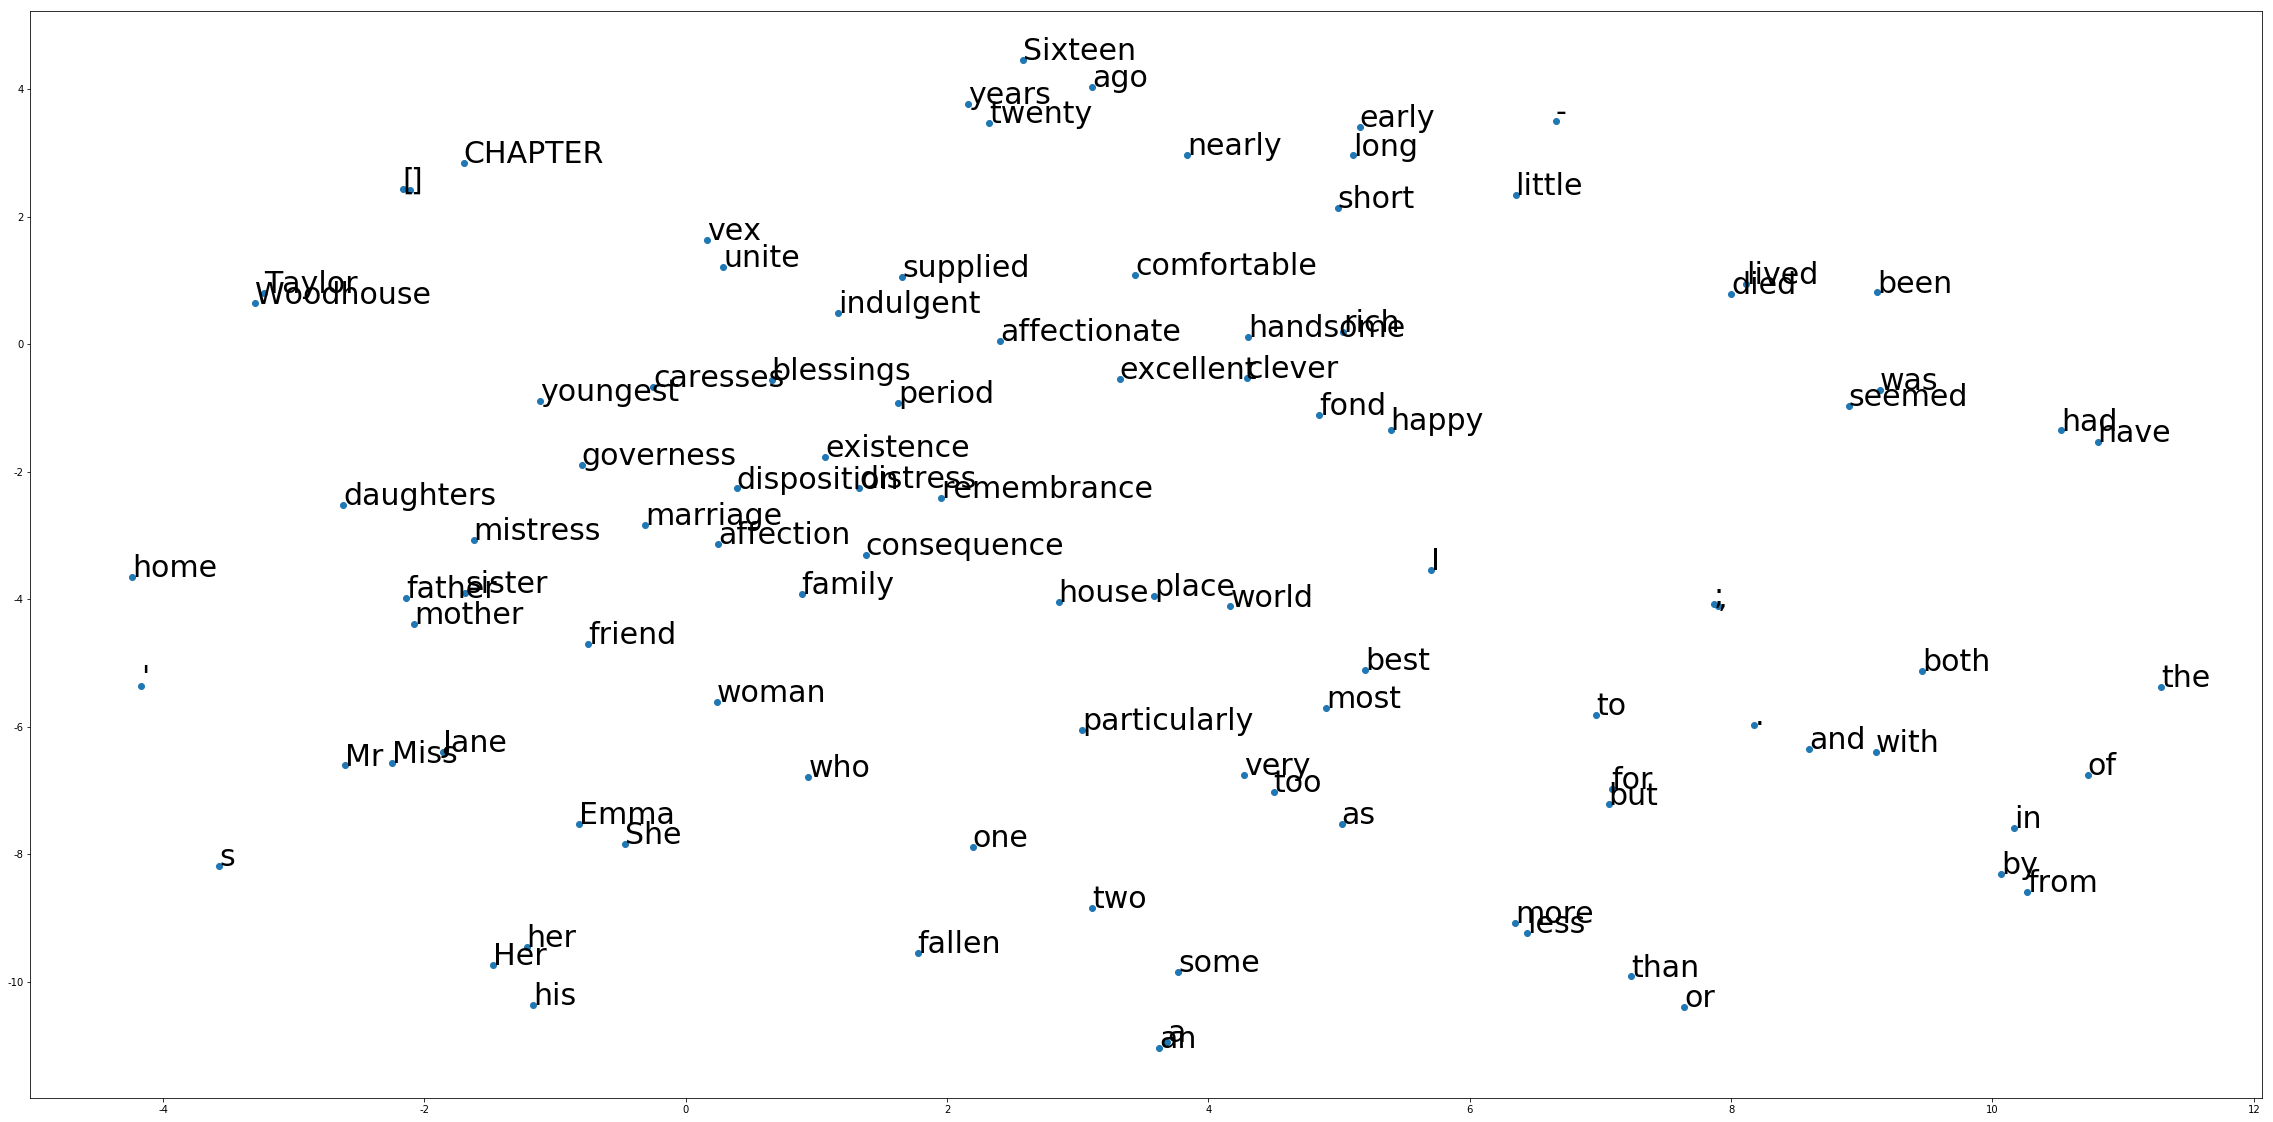

In [52]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()